# Data Preprocessing


## Importing Packages

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import librosa, librosa.display
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
from IPython.display import Image 
import plotly.graph_objects as go
import sys
import kaleido
import os

In [2]:
sns.set()
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("expand_frame_repr", False)
pd.set_option('display.float_format', '{:.2f}'.format)
sys.path.append(os.path.abspath(os.path.join('../scripts')))

### Importing python Scripts from scripts directory

In [3]:
from clean_audio import CleanAudio
from file_handler import FileHandler
from audio_vis import AudioVis

In [4]:
clean_audio = CleanAudio()
file_handler = FileHandler()
audio_vis = AudioVis()

## Load Data


In [5]:
PATH_TRAIN_WAV = "../data/AMHARIC/train/wav/"
PATH_TEST_WAV = "../data/AMHARIC/test/wav/"
PATH_TRAIN_TEXT = "../data/AMHARIC/train/text"
PATH_TEST_TEXT = "../data/AMHARIC/test/text"

In [6]:
train_labels = os.listdir(PATH_TRAIN_WAV)
test_labels = os.listdir(PATH_TEST_WAV)
train_labels = [i.strip('.wav') for i in train_labels]
test_labels = [i.strip('.wav') for i in test_labels]
print(f"Total training data: {len(train_labels)}")
print(f"Total test data: {len(test_labels)}")
train_labels[:3], test_labels[:3]

Total training data: 10875
Total test data: 359


(['tr_10653_tr13118', 'tr_4878_tr49079', 'tr_6599_tr66100'],
 ['06_d506023', '19_d519027', '01_d501030'])

## Create Metadata

In [7]:
text_data, label_data = file_handler.read_data(PATH_TRAIN_TEXT, PATH_TEST_TEXT, train_labels, test_labels)
print(f"Total training data: {len(text_data)}")
print(f"Total test data: {len(label_data)}")
# text_data[:2], label_data[:2]

Total training data: 11234
Total test data: 11234


In [8]:
data = pd.DataFrame({'key': label_data, 'text': text_data})
data[:5]

,key,text
0,tr_10000_tr097082,የተለያዩ የ ትግራይ አውራጃ ተወላጆች ገንዘባቸው ን አዋጥ ተው የ ልማት ተቋማትን እንዲ መሰርቱ ትልማ አይ ፈቅድ ም
1,tr_10001_tr097083,የ ጠመንጃ ተኩስ ተከፈተ ና አራት የኤርትራ ወታደሮች ተገደሉ
2,tr_10002_tr097084,ላነሷቸው ጥያቄዎች የ ሰጡት ን መልስ አቅርበ ነዋል
3,tr_10003_tr097085,እ ብዱ አስፋልቱ ላይ የ ኰለኰ ለ ው ድንጋይ መኪና አላ ሳልፍ አለ
4,tr_10004_tr097086,ጠጁ ን ኰ መኰ መ ኰ መኰ መ ና ሚስቱ ን ሲ ያሰቃ ያት አደረ


In [9]:
y = [x in test_labels for x in data.key]
data["category"] = ["Test" if i else "Train" for i in y]
data.sample(5)

,key,text,category
9582,tr_8838_tr87119,ኢትዮጵያ ሰባ ሺህ ወታደሮ ቿን አሰናብ ታለች,Train
3483,tr_3348_tr34049,በጣም የሚ ደን ቀኝ ግን ኢትዮጵያ በ ታሪኳ ለ መጀመሪያ ጊዜ ለ ጠላቶቹ ዋ ፍላጐት በ ግልጽ ሽን ጡን ገት ሮ በሚ ሟገት መሪ ስት ገዛ ማየታችን ነው,Train
4714,tr_4456_tr45057,የ ኢትዮጵያ ተቃዋሚ የፖለቲካ ድርጅቶች ህብረት እንቅስቃሴ ውን እያጠናከረ ነው በ እንግሊዝ ና በ አሜሪካ ስብሰባዎች ተጠሩ,Train
10048,tr_9257_tr091058,ጐረቤት ኬንያ በ ተለያዩ ምክንያት ወደ ግዛቷ የ ገቡት ን የውጭ አገር ስደተኞች በ ማሰር ና ማንነታቸው ን በ ማጣራት ላይ እንደምት ገኝ ታውቋል,Train
8796,tr_812_tr09012,አቶ ተወልደ እኔ ትናንት ስላል ነበርኩ ኦዲት ኮሚሽን ትናንት ያቀረበ ው ሀሳብ ም ን እንደሆነ እንዲ ገለጽ ልኝ እፈልጋ ለሁ አሉ,Train


In [10]:
data["char_length"] = [len(i) for i in data.text]
data.sample(5)

,key,text,category,char_length
3526,tr_3387_tr34088,ክለቦች እጃቸው ን ማስገባት የ ለ ባቸውም,Train,26
4543,tr_4301_tr44002,በ ጅቡቲ የሚገኙ ኢትዮጵያውያ ን የ ሌሎች አገሮች ዜጐች የ አክሱም ሀውልት እንዲ መለስ ጠየቁ,Train,59
400,tr_10361_tr100083,ኢትዮጵያውያ ን ቀይ ባህር ሳይ ደርሱ እንደማይ ቆሙ ይሰማ ቸዋል,Train,40
2817,tr_2749_tr28050,ሙሴቬኒ ጊዜያዊ አስተዳደር ሲሉ ም ን ማለታቸው እንደሆነ ይፋ አልተደረገ ም,Train,47
2794,tr_2728_tr28029,እንዲያ ውም በ ባንኮች ታሪክ ውስጥ እንዲ ህ አይነት ቡድን አል ተዘጋጀ ም ማለት ይቻላል,Train,56


In [11]:
duration_of_recordings = []
for i in range(data.shape[0]):
    path = ""
    if data.category[i] == "Train":
        path = PATH_TRAIN_WAV + data.key[i] + ".wav"
    else:
        path = PATH_TEST_WAV + data.key[i] + ".wav"


    audio, fs = librosa.load(path, sr=None)
    duration_of_recordings.append(float(len(audio) / fs))

In [37]:
data["duration"] = duration_of_recordings
data.sample(5)

,key,text,category,char_length,duration
9971,tr_9188_tr90109,የ ሀረር ተጓዦች በ ፍተሻው በሚ ደርስ ባቸው መጉላላት ተማረሩ,Train,39,6.02
2046,tr_2054_tr21055,ብር ሰብ ስ በ ን ለ ኢትዮጵያ መንግስት እንሰጣ ለ ን,Train,34,3.97
6693,tr_6237_tr63038,በ ተጨማሪ ፕሮግራም ማውጣት አለ,Train,20,2.82
7314,tr_6797_tr68098,ካርተር ጆን ሰን ኦልብራይት ሆኑ ክሊንተን አሜሪካዊ ናቸው,Train,36,4.86
9924,tr_9145_tr90066,ባለ ሬከር ዱ ኢንቨስትመንት ሽያጭ ይፋ ሆነ,Train,27,4.99


## Data Exploration

In [38]:
data.describe()

,char_length,duration
count,11234.00,11234.00
mean,55.26,6.65
std,28.69,3.06
min,10.00,1.79
25%,33.00,4.35
50%,47.00,5.82
75%,74.00,8.32
max,163.00,24.19


### Transcription

In [43]:
words_in_data = pd.DataFrame(' '.join(data['text']).split())
words_in_data.columns = ['word']
words_data = words_in_data.groupby(['word']).agg({'word': 'count'})
words_data.columns = ['counts']
words_data.reset_index(inplace=True)
words_data = words_data.sort_values("counts", ascending=False)
words_data.head()

,word,counts
11779,የ,7952
4889,በ,6570
7746,ን,6470
7704,ና,3238
2708,ም,2958


In [46]:
words_data.loc[words_data['counts'] < 1000, 'word'] = 'Other words'
fig = px.pie(words_data, values='counts', names='word', title='Distribution of words', width=800, height=500)
Image(pio.to_image(fig, format='png', width=1200))

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


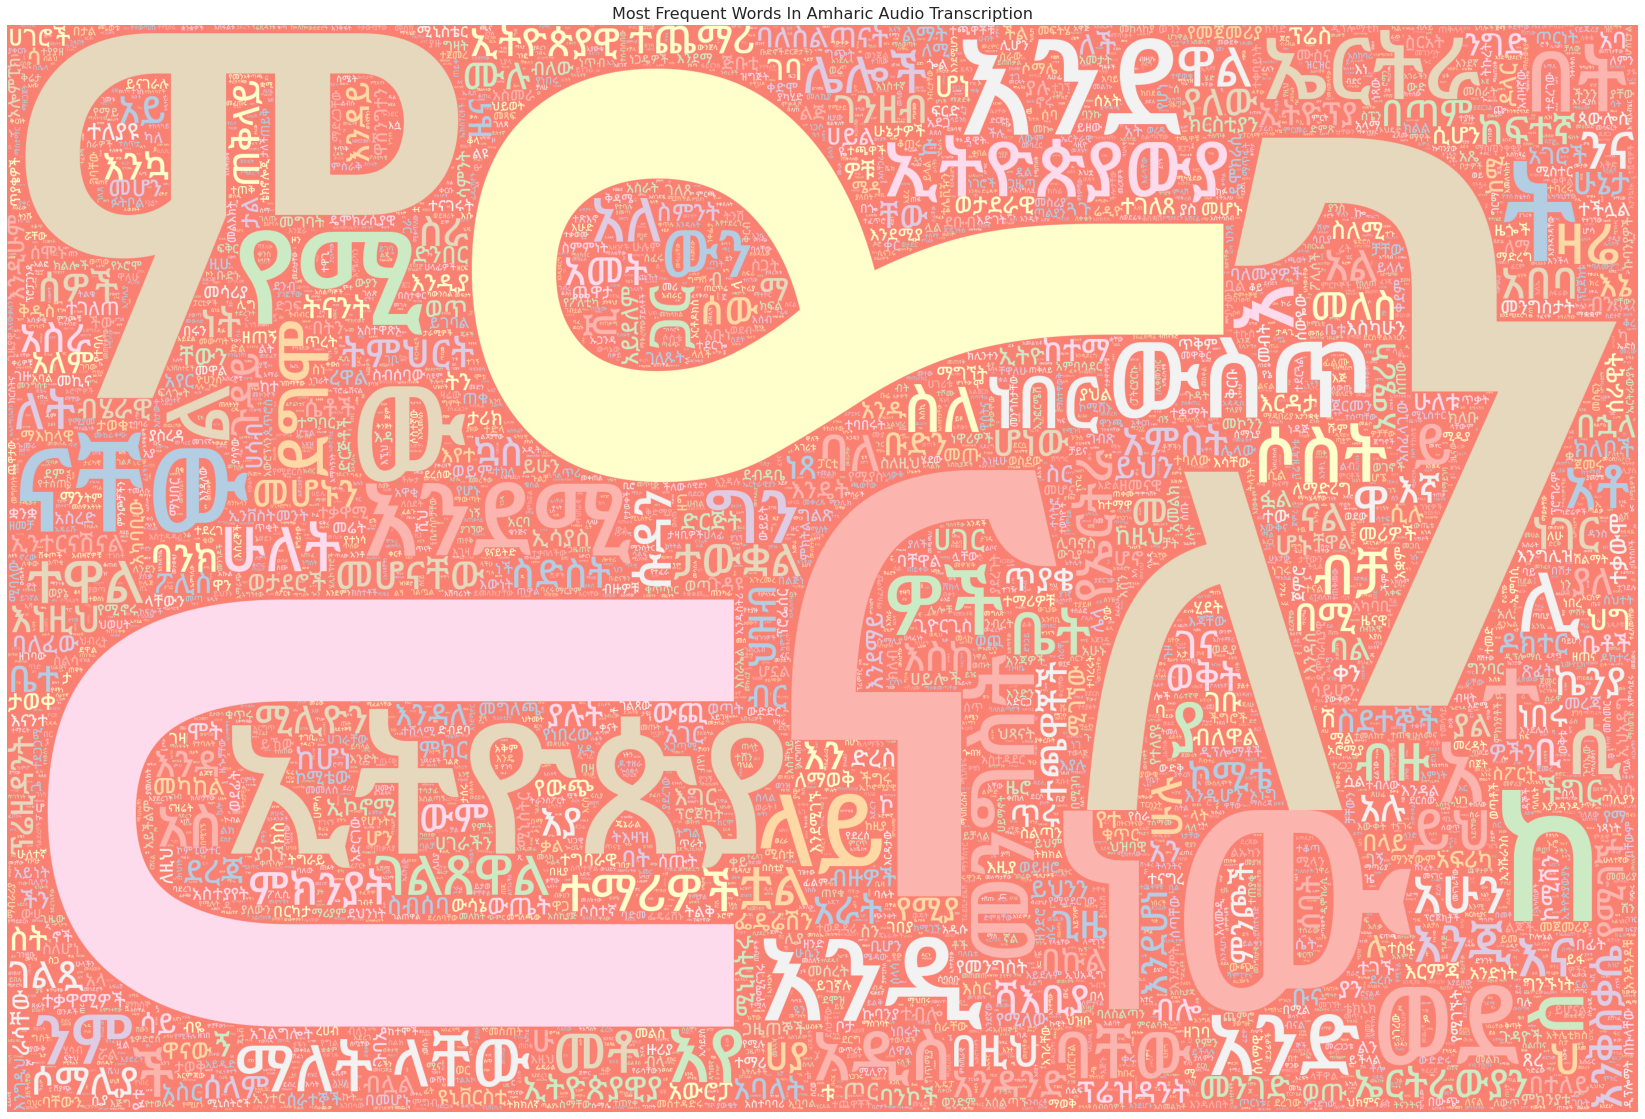

In [45]:
audio_vis.get_wc(data, [])

### Audio


In [47]:
def get_paths(category, key):
  if(category == "Train"):
    return PATH_TRAIN_WAV + key + ".wav"
  else:
    return PATH_TEST_WAV + key + ".wav"

In [58]:
path_to_sample = get_paths(data.category[0], data.key[0])
sample_audio, sr = file_handler.read_audio_signal(path_to_sample)
print(sr)
print(sample_audio)

22000
[-0.11535194 -0.13088593 -0.11130099 ... -0.12260991 -0.14306018
 -0.09356608]


In [59]:
audio_vis.play_audio(sample_audio)

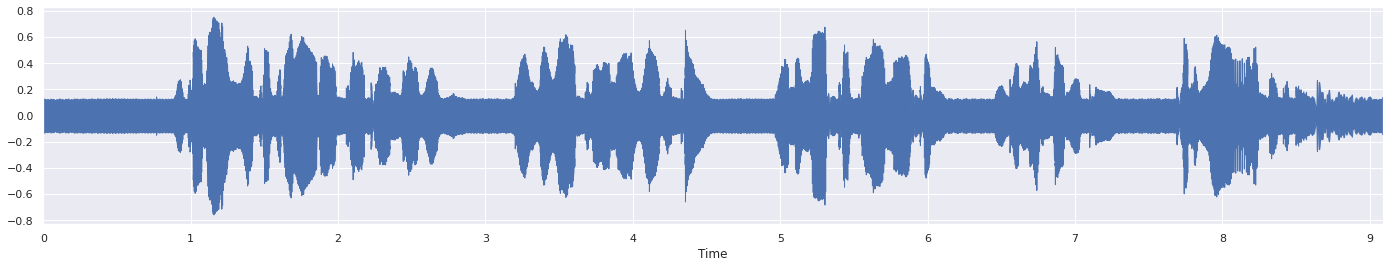

In [60]:
audio_vis.wav_plot(sample_audio)

## Remove Outliers

In [62]:
fig = px.histogram(data, x="char_length", marginal="box", nbins=500)
Image(pio.to_image(fig, format='png', width=1200))

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


In [63]:
fig = px.histogram(data, x="duration", marginal="box", nbins=500)
Image(pio.to_image(fig, format='png', width=1200))

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


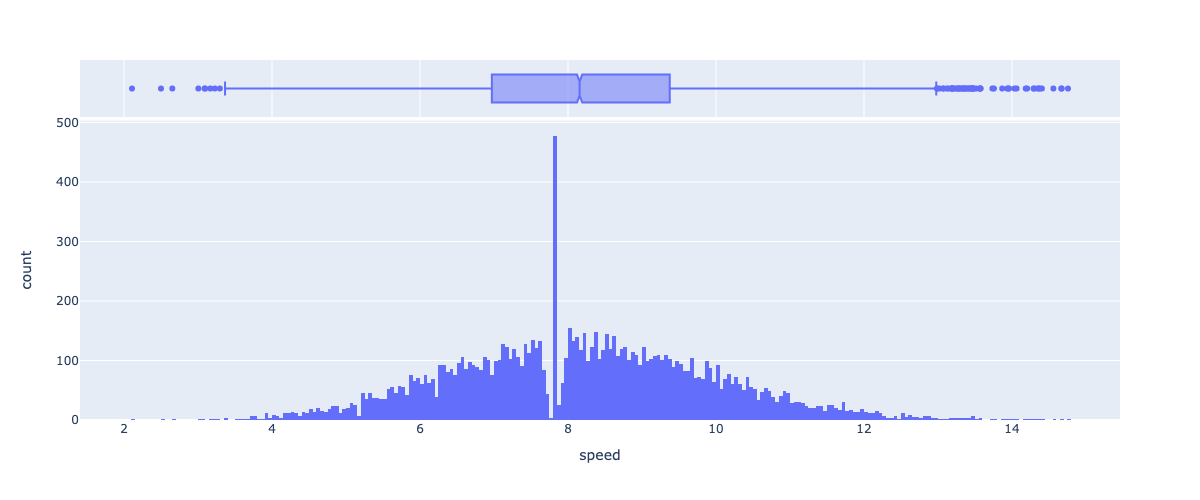

In [ ]:
data["speed"] = data.char_length / data.duration
fig = px.histogram(data, x="speed", marginal="box", nbins=500)
Image(pio.to_image(fig, format='png', width=1200))

<function matplotlib.pyplot.show(close=None, block=None)>

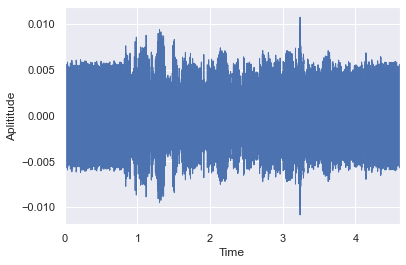

In [16]:
#Wave form 
sampl_train_file = "../data/AMHARIC/train/wav/tr_1_tr01001.wav"

signal, sr =librosa.load(sampl_train_file, sr=22050, mono=True, offset=0.0, duration=None)
librosa.display.waveplot(signal, sr=sr)
plt.xlabel("Time")
plt.ylabel("Aplititude")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

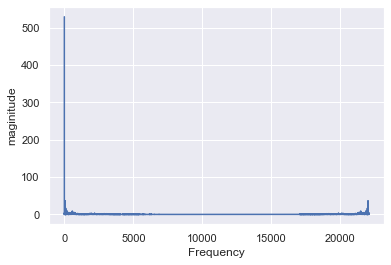

In [17]:
#FFT spectrum 
#Fourier transform also known as the fast fourier transform
#Decomposes complex periodic sound like the one above into sum 
#of sine waves oscilating at
#different frequencies 
#The FFT moves us from the time domain to the frequency domain
#It should be noted that with FFT we loose information about time 
fft = np.fft.fft(signal)
maginitude =np.abs(fft)
frequency =np.linspace(0,sr, len(maginitude))
plt.plot(frequency,maginitude)
plt.xlabel("Frequency")
plt.ylabel("maginitude")
plt.show

In the power  spectrum , more energy is concetrated in the lower frequencies , the higher you go with the frequencies the 
less energy 

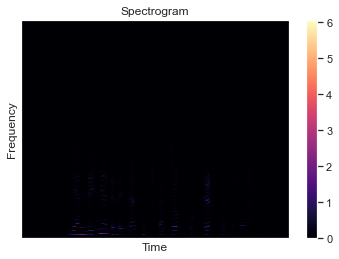

In [18]:
#Because of the FTT loos of time we need to find away of 
#seeing how things change with time 
#The Short term Fourier transform is the solution to 
#the FTT limitation

#The STFT
#it computes several FTT at different intervals and in doing so it preserves information about time 
#The different intervals at which we perform the FTT is given by the fixed frame size (eg, 2048 samples)
#This gives us a spectrogram which is a representation of magnitude as a function of frequency and time
#
#spectogram stft


n_fft =2048
hop_length =512

stft =librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)
spectrogram = np.abs(stft)

librosa.display.specshow(spectrogram,sr=sr, hop_length=hop_length)
plt.title("Spectrogram")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

Most of the frequencies have very low aplititude, so they contribute littel to the overall sound

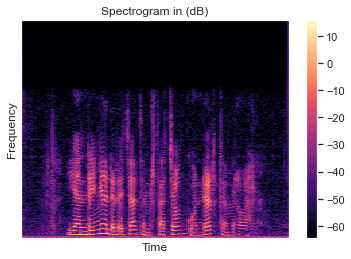

In [19]:
#log spectrogram 
log_spectrogram = librosa.amplitude_to_db(spectrogram)
librosa.display.specshow(log_spectrogram,sr=sr, hop_length=hop_length)
plt.title("Spectrogram in (dB)")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

Most of the energy is concetrated on the lower frequencies 

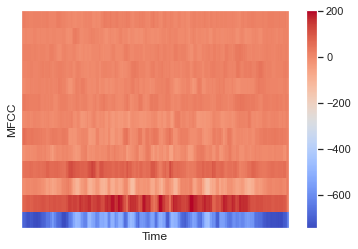

In [20]:
#MFCCs
#Mel frequency Cepstral Cooefficients (MFCCs)
#The MFCC are capble of capture the different quality of sound like capturing the timbraltextual 
#aspects of sound
#MFCC are also a frequency domain feature 
#The greatest advantage of MFCCs over a spectrogram is that they approximate the human 
#auditory system .. it is important for deep learning 
#Mostly 13 -40 coeficients are used in audio music which are caluculated at each frame 

#they are used ofr speech reconginitions , music genre classification and music instrument classification
MFCCs = librosa.feature.mfcc(signal, n_fft = n_fft, hop_length=hop_length, n_mfcc=13)
librosa.display.specshow(MFCCs,sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC")
plt.colorbar()
plt.show()

In [21]:
#Print the timeline of the audio 

y, sr = librosa.load(sampl_train_file.format(audio)) #you just need to make sure your audio is in the same folder in which you are coding or else you can change the path as per your requirement
time = np.arange(0,len(y))/sr
print(time) # prints timeline of arabic6

[0.00000000e+00 4.53514739e-05 9.07029478e-05 ... 4.60789116e+00
 4.60793651e+00 4.60798186e+00]


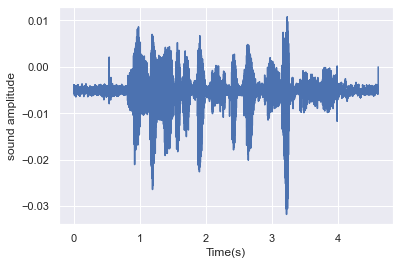

In [22]:
#Another way to plot time vs amplititude

y, sr = librosa.load(sampl_train_file.format(audio))
time = np.arange(0,len(y))/sr
fig, ax = plt.subplots()
ax.plot(time,y)
ax.set(xlabel='Time(s)',ylabel='sound amplitude')
plt.show()

[112.34714674]


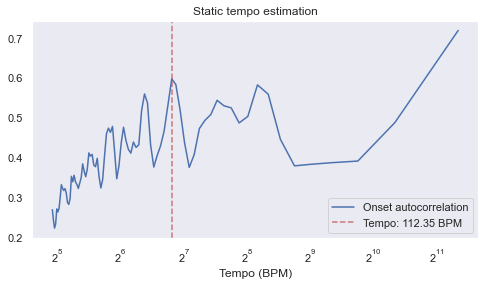

In [23]:
#ploting and finding the estimated tempo
onset_env = librosa.onset.onset_strength(y, sr=sr)
tempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr)
print(tempo)
tempo = np.asscalar(tempo)
# Compute 2-second windowed autocorrelation
hop_length = 512
ac = librosa.autocorrelate(onset_env, 2 * sr // hop_length)
freqs = librosa.tempo_frequencies(len(ac), sr=sr,hop_length=hop_length)
# Plot on a BPM axis.  We skip the first (0-lag) bin.
plt.figure(figsize=(8,4))
plt.semilogx(freqs[1:], librosa.util.normalize(ac)[1:],label='Onset autocorrelation', basex=2)
plt.axvline(tempo, 0, 1, color='r', alpha=0.75, linestyle='--',label='Tempo: {:.2f} BPM'.format(tempo))
plt.xlabel('Tempo (BPM)')
plt.grid()
plt.title('Static tempo estimation')
plt.legend(frameon=True)
plt.axis('tight')
plt.show()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
///
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


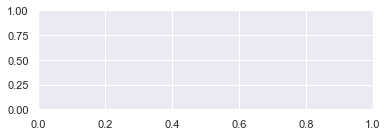

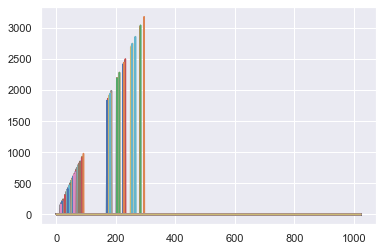

In [24]:
#finding and plotting the pitch 
pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
print(pitches)
print('///')
print(magnitudes)
plt.subplot(212)
plt.show()
plt.plot(pitches)
plt.show()

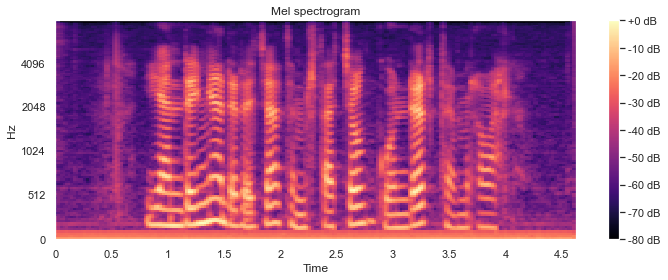

In [25]:
#cumpute a mel-scaled spectrogram
librosa.feature.melspectrogram(y=y, sr=sr)

D = np.abs(librosa.stft(y))**2
S = librosa.feature.melspectrogram(S=D)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()
plt.show()

## Clean Audio

## Clean Text

## Save the data in numpy format

Saving the data in numpy format will increase the read spread significantly
